In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Academic.csv")
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [5]:
list(data.columns)

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation r

In [6]:
data.shape

(4424, 37)

In [7]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
data.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [9]:
data.Target.value_counts(normalize=True)*100

Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: Target, dtype: float64

In [10]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


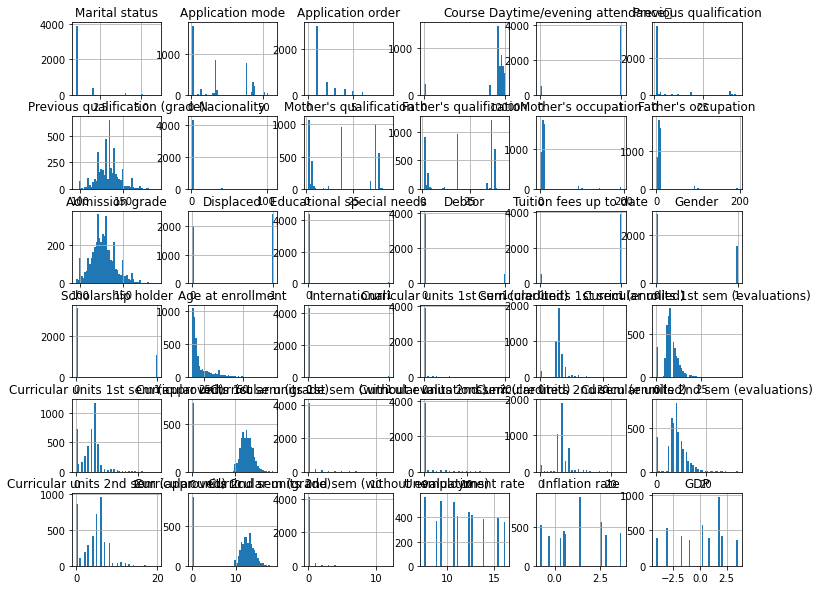

In [11]:
_ = data.hist(bins=50, figsize=(12,10))


In [12]:
data.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [13]:
features = ["Application mode", "Application order", "Course", "Previous qualification", "Previous qualification (grade)"]
data[features].head()

,Application mode,Application order,Course,Previous qualification,Previous qualification (grade)
0,17,5,171,1,122.0
1,15,1,9254,1,160.0
2,1,5,9070,1,122.0
3,17,2,9773,1,122.0
4,39,1,8014,1,100.0


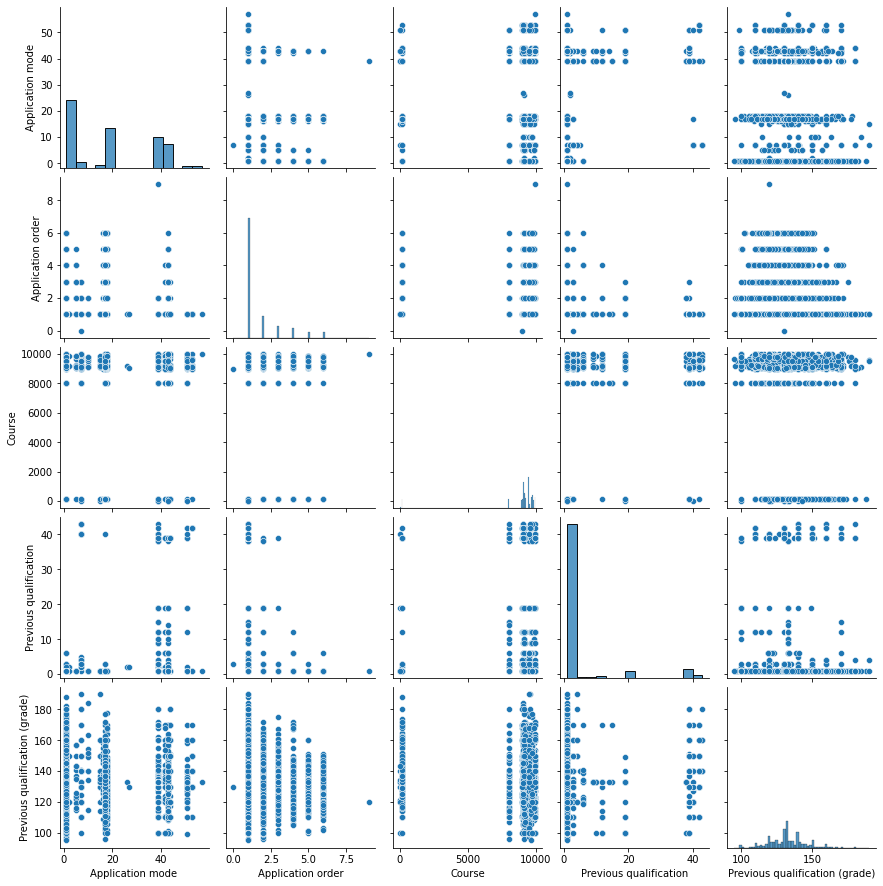

In [14]:
# Scatterplots
_ = sns.pairplot(data[features])
# An equivalent plot can be done with pandas:
#_ = pd.plotting.scatter_matrix(df[features], figsize=(12, 8))

In [15]:
# Correlations
correlations = data.corr()  # this is a dataframe
# let's see how much each attribute correlates with the outcome 'like'
correlations['Marital status'].sort_values(ascending=False)

Marital status                                    1.000000
Age at enrollment                                 0.522717
Application mode                                  0.264006
Mother's qualification                            0.193163
Father's qualification                            0.130353
Curricular units 2nd sem (credited)               0.062831
Previous qualification                            0.062529
Curricular units 1st sem (credited)               0.061209
Curricular units 1st sem (evaluations)            0.058030
Curricular units 1st sem (enrolled)               0.052107
Course                                            0.046365
Curricular units 2nd sem (enrolled)               0.039026
Mother's occupation                               0.034994
Curricular units 1st sem (without evaluations)    0.034711
Debtor                                            0.034304
Father's occupation                               0.031609
Curricular units 2nd sem (evaluations)            0.0227

In [4]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score ### library for cross validation score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [17]:
#Checking the distributation
print(f'Distribution before imbalancing') 

data_count=data['Target'].value_counts()
print(data_count)

imbalance_target=(data_count[1] /(data_count[0] + data_count[1])) * 100
print(f'Balanced Percentage : {imbalance_target} %')

imbalance_target=(data_count[0] / (data_count[0] + data_count[1])) * 100
print(f'Balanced Percentage : {imbalance_target} %')

Distribution before imbalancing
Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64
Balanced Percentage : 39.146005509641874 %
Balanced Percentage : 60.85399449035813 %


In [5]:
x = data.drop(['Target'],axis=1)
y = data['Target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=50)
# Define the k fold cross validation parameters for various classification model evaluation


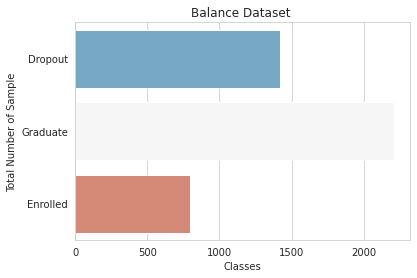

In [20]:
y = LabelEncoder().fit_transform(y)
### summarize the distribution
# Target outout class
sns.set_style('whitegrid')
fig= sns.countplot(y= data['Target'],data=data,palette='RdBu_r').get_figure()
plt.title('Balance Dataset ')
plt.xlabel('Classes')
plt.ylabel('Total Number of Sample')
plt.show()
fig.savefig('histogram_org_heart.pdf')

In [21]:
from collections import Counter
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE ### library for oversampling

class=0, n=2209 (33.333%)
class=2, n=2209 (33.333%)
class=1, n=2209 (33.333%)


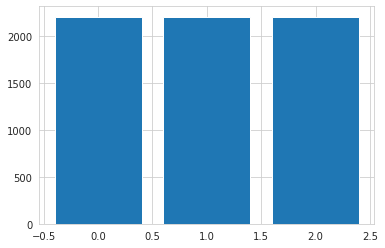

In [22]:
y = LabelEncoder().fit_transform(y)
### transform the dataset
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)
### summarize distribution
counter = Counter(y)
for k , v in counter.items():
    per = v/len(y)*100
    print('class=%d, n=%d (%.3f%%)'%(k,v,per))
## plot the distribution
pyplot.bar(counter.keys(),counter.values())
pyplot.show()

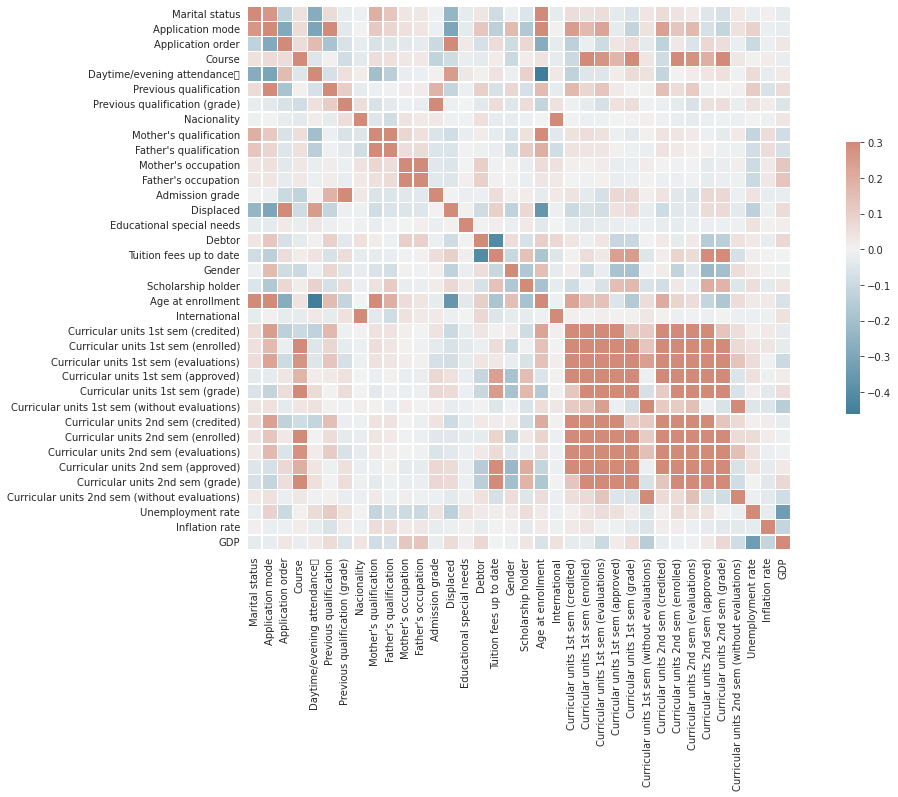

In [23]:
# Plotting a correlation matrix 
f = plt.figure(figsize=(20, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(),annot=False, cmap=cmap,vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig("Correlation.png") # save as png

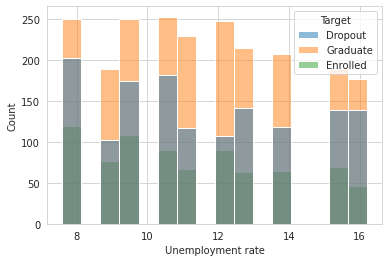

In [24]:
sns.histplot(x='Unemployment rate',data=data,hue='Target')

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict

In [8]:
cv = StratifiedKFold(n_splits=10, shuffle=False)

In [27]:
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [29]:
rfc_cv_score = cross_val_score(rfc, x, y, cv=5, scoring='roc_auc')

In [30]:
y_pred = cross_val_predict(rfc,X_test,y_test,cv=cv)

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7513562386980108


In [32]:
print(" Confusion Matrix ")
print(confusion_matrix(y_test, rfc_predict))
print('\n')


 Confusion Matrix 
[[294  38  49]
 [ 34  71  84]
 [  8  20 508]]




Feature: 0, Score: 0.00389
Feature: 1, Score: 0.02170
Feature: 2, Score: 0.01495
Feature: 3, Score: 0.03364
Feature: 4, Score: 0.00300
Feature: 5, Score: 0.00621
Feature: 6, Score: 0.03690
Feature: 7, Score: 0.00249
Feature: 8, Score: 0.02126
Feature: 9, Score: 0.02071
Feature: 10, Score: 0.02758
Feature: 11, Score: 0.02853
Feature: 12, Score: 0.04271
Feature: 13, Score: 0.00734
Feature: 14, Score: 0.00136
Feature: 15, Score: 0.01346
Feature: 16, Score: 0.03848
Feature: 17, Score: 0.00981
Feature: 18, Score: 0.01525
Feature: 19, Score: 0.04165
Feature: 20, Score: 0.00147
Feature: 21, Score: 0.00697
Feature: 22, Score: 0.02083
Feature: 23, Score: 0.03504
Feature: 24, Score: 0.09206
Feature: 25, Score: 0.07113
Feature: 26, Score: 0.00438
Feature: 27, Score: 0.00582
Feature: 28, Score: 0.02242
Feature: 29, Score: 0.04080
Feature: 30, Score: 0.13897
Feature: 31, Score: 0.09614
Feature: 32, Score: 0.00526
Feature: 33, Score: 0.02263
Feature: 34, Score: 0.02131
Feature: 35, Score: 0.02386


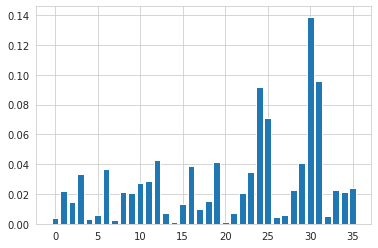

In [33]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [34]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# hyperparameter tuning of random forest method

In [35]:
#Create the parameter grid based on the results of random search 
param_grid = { 
    'n_estimators': [100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(2,30)
    
}


In [37]:
# Instantiate the grid search model
grid_search_rd = GridSearchCV(estimator=RandomForestClassifier(), 
                           param_grid=param_grid, 
                           cv=cv, n_jobs=1, verbose=1, scoring = "accuracy")
grid_search_rd.fit(X_train,y_train)


Fitting 10 folds for each of 252 candidates, totalling 2520 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=1)

In [38]:
print("The best parameters are : ", grid_search_rd.best_estimator_)
print("Cross-validated best score of Random Forest Model {}%".format(round(grid_search_rd.best_score_ * 100,3)))

The best parameters are :  RandomForestClassifier(max_depth=22, max_features='log2', n_estimators=200)
Cross-validated best score of Random Forest Model 77.697%


In [39]:
#Create a Gaussian Classifier with the tuned parameters
clf_rd=RandomForestClassifier(max_depth=22, max_features='log2', n_estimators=200)
clf_rd.fit(X_train,y_train)

RandomForestClassifier(max_depth=22, max_features='log2', n_estimators=200)

In [40]:
#Predict the response for test dataset created from the data
y_pred_rf = clf_rd.predict(X_test)

In [41]:
print("Accuracy of the Random Forest Model on a test data:",metrics.accuracy_score(y_test, y_pred_rf))
# Create the Confusion Matrix to understand Sensitivity,Specificity,Accuracy
print('Confusion Matrix ' , confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy of the Random Forest Model on a test data: 0.7848101265822784
Confusion Matrix  [[288  42  51]
 [ 25  75  89]
 [  8  23 505]]
              precision    recall  f1-score   support

     Dropout       0.90      0.76      0.82       381
    Enrolled       0.54      0.40      0.46       189
    Graduate       0.78      0.94      0.86       536

    accuracy                           0.78      1106
   macro avg       0.74      0.70      0.71      1106
weighted avg       0.78      0.78      0.78      1106



In [42]:
# Evaluate the Random Forest Model using K-fold cross validation 
rd_scores = cross_val_score(clf_rd, X_train,y_train, cv=cv,scoring='accuracy',n_jobs=1)
# report performance
print("Accuracy from each of 10 folds: ",rd_scores )
print('Accuracy of Random Forest Model using k fold cross validation is : %.3f (%.3f)' % (np.mean(rd_scores*100), np.std(rd_scores*100)))


Accuracy from each of 5 folds:  [0.76204819 0.77409639 0.76807229 0.74698795 0.75903614 0.79819277
 0.77409639 0.80421687 0.76132931 0.78851964]
Accuracy of Random Forest Model using k fold cross validation is : 77.366 (1.732)


In [ ]:
### Random forest with change in parameter

In [43]:
#Create the parameter grid based on the results of random search 
param_grid = { 
    'n_estimators': [25,50,100,500],
    'max_samples': [250],
    'criterion': ['gini','entrophy'],
    'random_state': [42]

}


In [44]:
# Instantiate the grid search model
grid_search_rd = GridSearchCV(estimator=RandomForestClassifier(), 
                           param_grid=param_grid, 
                           cv=cv, n_jobs=1, verbose=1, scoring = "accuracy")
grid_search_rd.fit(X_train,y_train)


Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_samples': [250],
                         'n_estimators': [25, 50, 100, 500],
                         'random_state': [42]},
             scoring='accuracy', verbose=1)

In [45]:
print("The best parameters are : ", grid_search_rd.best_estimator_)
print("Cross-validated best score of Random Forest Model {}%".format(round(grid_search_rd.best_score_ * 100,3)))

The best parameters are :  RandomForestClassifier(max_samples=250, n_estimators=500, random_state=42)
Cross-validated best score of Random Forest Model 75.738%


In [46]:
#Create a Gaussian Classifier with the tuned parameters
clf_rd=RandomForestClassifier(max_samples=250, n_estimators=500,random_state=42)
clf_rd.fit(X_train,y_train)

RandomForestClassifier(max_samples=250, n_estimators=500, random_state=42)

In [47]:
#Predict the response for test dataset created from the data
y_pred_rf = clf_rd.predict(X_test)

In [48]:
print("Accuracy of the Random Forest Model on a test data:",metrics.accuracy_score(y_test, y_pred_rf))
# Create the Confusion Matrix to understand Sensitivity,Specificity,Accuracy
print('Confusion Matrix ' , confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy of the Random Forest Model on a test data: 0.7757685352622061
Confusion Matrix  [[296  26  59]
 [ 36  46 107]
 [  7  13 516]]
              precision    recall  f1-score   support

     Dropout       0.87      0.78      0.82       381
    Enrolled       0.54      0.24      0.34       189
    Graduate       0.76      0.96      0.85       536

    accuracy                           0.78      1106
   macro avg       0.72      0.66      0.67      1106
weighted avg       0.76      0.78      0.75      1106



In [49]:
# Evaluate the Random Forest Model using K-fold cross validation 
rd_scores = cross_val_score(clf_rd, X_train,y_train, cv=cv,scoring='accuracy',n_jobs=1)
# report performance
print("Accuracy from each of 10 folds: ",rd_scores )
print('Accuracy of Random Forest Model using k fold cross validation is : %.3f (%.3f)' % (np.mean(rd_scores*100), np.std(rd_scores*100)))

Accuracy from each of 5 folds:  [0.75       0.75903614 0.75       0.73493976 0.75903614 0.76807229
 0.76807229 0.78614458 0.76132931 0.73716012]
Accuracy of Random Forest Model using k fold cross validation is : 75.738 (1.449)


In [ ]:
### Random forest with change in parameter

In [58]:
#Create the parameter grid based on the results of random search 
param_grid = { 
    'n_estimators': [5,10,15,45,60],
    'max_depth': [3,5,7,9],
    'criterion': ['gini','entrophy'],
    'min_samples_leaf':[2,4,6],
    'min_samples_split':[5,7,9]
}


In [59]:
# Instantiate the grid search model
grid_search_rd = GridSearchCV(estimator=RandomForestClassifier(), 
                           param_grid=param_grid, 
                           cv=cv, n_jobs=1, verbose=1, scoring = "accuracy")
grid_search_rd.fit(X_train,y_train)


Fitting 10 folds for each of 360 candidates, totalling 3600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [5, 7, 9],
                         'n_estimators': [5, 10, 15, 45, 60]},
             scoring='accuracy', verbose=1)

In [60]:
print("The best parameters are : ", grid_search_rd.best_estimator_)
print("Cross-validated best score of Random Forest Model {}%".format(round(grid_search_rd.best_score_ * 100,3)))

The best parameters are :  RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=60)
Cross-validated best score of Random Forest Model 76.855%


In [61]:
#Create a Gaussian Classifier with the tuned parameters
clf_rd=RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=60)
clf_rd.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=60)

In [62]:
#Predict the response for test dataset created from the data
y_pred_rf = clf_rd.predict(X_test)

In [63]:
print("Accuracy of the Random Forest Model on a test data:",metrics.accuracy_score(y_test, y_pred_rf))
# Create the Confusion Matrix to understand Sensitivity,Specificity,Accuracy
print('Confusion Matrix ' , confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy of the Random Forest Model on a test data: 0.7784810126582279
Confusion Matrix  [[284  37  60]
 [ 22  65 102]
 [  8  16 512]]
              precision    recall  f1-score   support

     Dropout       0.90      0.75      0.82       381
    Enrolled       0.55      0.34      0.42       189
    Graduate       0.76      0.96      0.85       536

    accuracy                           0.78      1106
   macro avg       0.74      0.68      0.70      1106
weighted avg       0.77      0.78      0.76      1106



In [64]:
# Evaluate the Random Forest Model using K-fold cross validation 
rd_scores = cross_val_score(clf_rd, X_train,y_train, cv=cv,scoring='accuracy',n_jobs=1)
# report performance
print("Accuracy from each of 10 folds: ",rd_scores )
print('Accuracy of Random Forest Model using k fold cross validation is : %.3f (%.3f)' % (np.mean(rd_scores*100), np.std(rd_scores*100)))

Accuracy from each of 10 folds:  [0.76204819 0.77710843 0.75       0.78012048 0.78313253 0.76506024
 0.7439759  0.71385542 0.80060423 0.77039275]
Accuracy of Random Forest Model using k fold cross validation is : 76.463 (2.300)


In [57]:
#Create the parameter grid based on the results of random search 
param_grid = { 
    'n_estimators': [10,20,50,75],
    'max_features': ['sqrt', 0.2,0.4,0.8],
    'max_depth': [10,15,40,80],
    'random_state' :[42]
}


In [58]:
# Instantiate the grid search model
grid_search_rd = GridSearchCV(estimator=RandomForestClassifier(), 
                           param_grid=param_grid, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search_rd.fit(X_train,y_train)


Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 40, 80],
                         'max_features': ['sqrt', 0.2, 0.4, 0.8],
                         'n_estimators': [10, 20, 50, 75],
                         'random_state': [42]},
             scoring='accuracy', verbose=1)

In [59]:
print("The best parameters are : ", grid_search_rd.best_estimator_)
print("Cross-validated best score of Random Forest Model {}%".format(round(grid_search_rd.best_score_ * 100,3)))

The best parameters are :  RandomForestClassifier(max_depth=15, max_features=0.4, n_estimators=75,
                       random_state=42)
Cross-validated best score of Random Forest Model 77.578%


In [61]:
#Create a Gaussian Classifier with the tuned parameters
clf_rd=RandomForestClassifier(max_depth=15, max_features=0.4, n_estimators=75,random_state=42)
clf_rd.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features=0.4, n_estimators=75,
                       random_state=42)

In [62]:
#Predict the response for test dataset created from the data
y_pred_rf = clf_rd.predict(X_test)

In [63]:
print("Accuracy of the Random Forest Model on a test data:",metrics.accuracy_score(y_test, y_pred_rf))
# Create the Confusion Matrix to understand Sensitivity,Specificity,Accuracy
print('Confusion Matrix ' , confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy of the Random Forest Model on a test data: 0.783001808318264
Confusion Matrix  [[285  45  51]
 [ 26  78  85]
 [ 13  20 503]]
              precision    recall  f1-score   support

     Dropout       0.88      0.75      0.81       381
    Enrolled       0.55      0.41      0.47       189
    Graduate       0.79      0.94      0.86       536

    accuracy                           0.78      1106
   macro avg       0.74      0.70      0.71      1106
weighted avg       0.78      0.78      0.77      1106



In [64]:
# Evaluate the Random Forest Model using K-fold cross validation 
rd_scores = cross_val_score(clf_rd, X_train,y_train, cv=cv,scoring='accuracy',n_jobs=-1)
# report performance
print('Accuracy of Random Forest Model using k fold cross validation is : %.3f (%.3f)' % (np.mean(rd_scores), np.std(rd_scores*2)))

Accuracy of Random Forest Model using k fold cross validation is : 0.770 (0.035)


Feature: 0, Score: 0.00359
Feature: 1, Score: 0.01749
Feature: 2, Score: 0.01332
Feature: 3, Score: 0.03715
Feature: 4, Score: 0.00257
Feature: 5, Score: 0.00541
Feature: 6, Score: 0.03679
Feature: 7, Score: 0.00211
Feature: 8, Score: 0.01883
Feature: 9, Score: 0.01817
Feature: 10, Score: 0.02639
Feature: 11, Score: 0.02543
Feature: 12, Score: 0.04049
Feature: 13, Score: 0.00656
Feature: 14, Score: 0.00092
Feature: 15, Score: 0.01030
Feature: 16, Score: 0.04645
Feature: 17, Score: 0.00764
Feature: 18, Score: 0.01102
Feature: 19, Score: 0.03691
Feature: 20, Score: 0.00135
Feature: 21, Score: 0.00645
Feature: 22, Score: 0.01845
Feature: 23, Score: 0.02945
Feature: 24, Score: 0.09675
Feature: 25, Score: 0.04903
Feature: 26, Score: 0.00412
Feature: 27, Score: 0.00527
Feature: 28, Score: 0.02502
Feature: 29, Score: 0.03424
Feature: 30, Score: 0.19481
Feature: 31, Score: 0.10169
Feature: 32, Score: 0.00436
Feature: 33, Score: 0.01972
Feature: 34, Score: 0.01865
Feature: 35, Score: 0.02306


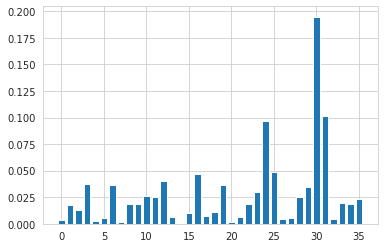

<Figure size 1800x1440 with 0 Axes>

In [65]:
# Feature importance after hyper parameter tunning
importance = clf_rd.feature_importances_

# Feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.figure(figsize=(25,20))
plt.show()

In [ ]:
### hyperparameter with change in parameter

## hyperparameter tuning of logistics regression

In [66]:
model = LogisticRegression()

In [67]:
# Create the parameter grid based on the results of random search 
params = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'penalty' : ['l2','none', 'l1'],
              'C' : [100, 10, 1.0],
              'random_state': [42]
             }

In [68]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

In [69]:
grid_result = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


In [70]:
final_lr = grid_result.best_estimator_
final_lr

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [71]:
### accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Cross-validated best score of {}%".format(round(grid_search_rd.best_score_ * 100,3)))

Best: 0.764314 using {'C': 1.0, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
Cross-validated best score of 77.578%


In [72]:
# create model based on the tuned hyper-parameters
clf_lr = LogisticRegression(C= 1, penalty = 'l1', random_state = 42, solver = 'liblinear')

In [73]:
#Predict the response for test dataset created from the data
y_pred = final_lr.predict(X_test)
print("Accuracy on test data :",metrics.accuracy_score(y_test, y_pred))### accuracy on test data set

Accuracy on test data : 0.7649186256781193


In [74]:
target_names = ['Dropout', 'Enrolled','Graduate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Dropout       0.84      0.75      0.79       381
    Enrolled       0.50      0.29      0.36       189
    Graduate       0.77      0.95      0.85       536

    accuracy                           0.76      1106
   macro avg       0.70      0.66      0.67      1106
weighted avg       0.75      0.76      0.75      1106



In [75]:
## confusion matrix
print('Confusion Matrix ' , confusion_matrix(y_test, y_pred_rf))

Confusion Matrix  [[285  45  51]
 [ 26  78  85]
 [ 13  20 503]]


In [76]:
# Evaluate the Logistic Regression Model using K-fold cross validation 
log_scores = cross_val_score(clf_lr, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance of LR
print("Accuracy from each of 10 folds: ",rd_scores )
print('Accuracy of the Logistic Regression Model using K-fold cross validation is : %.3f (%.3f)' % (np.mean(log_scores*100), np.std(log_scores*100)))

Accuracy from each of 5 folds:  [0.77108434 0.75301205 0.77409639 0.74698795 0.78012048 0.79518072
 0.78313253 0.79518072 0.74924471 0.75528701]
Accuracy of the Logistic Regression Model using K-fold cross validation is : 76.100 (1.434)


In [ ]:
#### Doing hyperparameter tuning with change in parameter of logistics regression

In [25]:
model = LogisticRegression()

In [26]:
# Create the parameter grid based on the results of random search 
params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
              'C' : [100, 10, 1.0, 0.1, 0.01],
              'random_state': [42]
             }

In [27]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=cv, n_jobs=1, verbose=1, scoring = "accuracy")

In [28]:
grid_result = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [31]:
final_lr = grid_result.best_estimator_
final_lr

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [35]:
# create model based on the tuned hyper-parameters
### accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



Best: 0.764631 using {'C': 1.0, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}


In [37]:
# create model based on the tuned hyper-parameters
clf_lr = LogisticRegression(penalty = 'l1', random_state = 42, solver = 'liblinear')

In [38]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.764631 using {'C': 1.0, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}


In [39]:
y_pred = final_lr.predict(X_test)
print("Accuracy on test data :",metrics.accuracy_score(y_test, y_pred))### accuracy on test data set

Accuracy on test data : 0.7649186256781193


In [41]:
target_names = ['Dropout', 'Enrolled','Graduate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Dropout       0.84      0.75      0.79       381
    Enrolled       0.50      0.29      0.36       189
    Graduate       0.77      0.95      0.85       536

    accuracy                           0.76      1106
   macro avg       0.70      0.66      0.67      1106
weighted avg       0.75      0.76      0.75      1106



In [57]:
print('Confusion Matrix ' , confusion_matrix(y_test, y_pred))

Confusion Matrix  [[230  16 135]
 [ 32  19 138]
 [ 20  11 505]]


In [ ]:
#### Doing hyperparameter tuning of logistics regression with change with parameter

In [43]:
model = LogisticRegression()

In [44]:
# Create the parameter grid based on the results of random search 
params = {'solver': [ 'lbfgs', 'sag', 'saga'],
              'penalty' : ['none' , 'l2', 'elasticnet'],
              'C' : [20,50,75,100],
              'random_state': [42]
             }

In [45]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

In [46]:
grid_result = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [47]:
final_lr = grid_result.best_estimator_
final_lr

LogisticRegression(C=75, random_state=42)

In [48]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.676326 using {'C': 75, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}


In [51]:
# create model based on the tuned hyper-parameters
clf_lr = LogisticRegression(penalty = 'l2', random_state = 42, solver = 'lbfgs',C=75)

In [52]:
y_pred = final_lr.predict(X_test)
print("Accuracy on test data :",metrics.accuracy_score(y_test, y_pred))### accuracy on test data set

Accuracy on test data : 0.6817359855334539


In [53]:
target_names = ['Dropout', 'Enrolled','Graduate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Dropout       0.82      0.60      0.69       381
    Enrolled       0.41      0.10      0.16       189
    Graduate       0.65      0.94      0.77       536

    accuracy                           0.68      1106
   macro avg       0.63      0.55      0.54      1106
weighted avg       0.67      0.68      0.64      1106



In [56]:
print('Confusion Matrix ' , confusion_matrix(y_test, y_pred))

Confusion Matrix  [[230  16 135]
 [ 32  19 138]
 [ 20  11 505]]


In [55]:
# Evaluate the Logistic Regression Model using K-fold cross validation 
log_scores = cross_val_score(clf_lr, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance of LR
print('Accuracy of the Logistic Regression Model using K-fold cross validation is : %.3f (%.3f)' % (np.mean(log_scores*100), np.std(log_scores*100)))

Accuracy of the Logistic Regression Model using K-fold cross validation is : 67.633 (2.275)


In [ ]:
##### Hyperparamter tuning with knn algorithm

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
k_base = KNeighborsClassifier()

k_base.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_base_pred = k_base.predict(X_test)

In [12]:
test_accuracy_base = accuracy_score(y_test,y_base_pred)*100

print("KKN accuracy for testing dataset without hyper parameter tuning is : {:.2f}%".format(test_accuracy_base) )

KKN accuracy for testing dataset without hyper parameter tuning is : 57.87%


In [13]:
knn = KNeighborsClassifier()
cross_val = StratifiedKFold(n_splits=10)
k_range = list(range(1, 11))
param_grid = {'n_neighbors': k_range, 
              'weights': ['distance','uniform'],
              'metric': ['euclidean', 'manhattan']              
             }

# defining parameter range
grid_knn = GridSearchCV(knn, param_grid, cv=cross_val, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search_clf = grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [14]:
y_pred_knn = grid_search_clf.predict(X_test)

In [15]:
test_accuracy_grid_cv = accuracy_score(y_test,y_pred_knn)*100
# Model Accuracy
print("KKN Gridsearch accuracy for testing dataset with hyper parameters : {:.2f}%".format(test_accuracy_grid_cv) )

KKN Gridsearch accuracy for testing dataset with hyper parameters : 65.01%


In [16]:
print(grid_search_clf.best_params_)

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [17]:
knn_best = KNeighborsClassifier(n_neighbors=10, weights = 'distance', metric = 'manhattan')

knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

In [18]:
y_test_pred = knn_best.predict(X_test)

In [19]:
test_accuracy = accuracy_score(y_test,y_test_pred)*100

print("KKN accuracy for testing dataset with hyper parameter tuning is : {:.2f}%".format(test_accuracy) )

KKN accuracy for testing dataset with hyper parameter tuning is : 65.01%


In [20]:
# Create the Confusion Matrix to understand Sensitivity,Specificity,Accuracy
cm = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix ' , cm)
print(classification_report(y_test, y_pred_knn))


Confusion Matrix  [[213  45 123]
 [ 26  38 125]
 [ 29  39 468]]
              precision    recall  f1-score   support

     Dropout       0.79      0.56      0.66       381
    Enrolled       0.31      0.20      0.24       189
    Graduate       0.65      0.87      0.75       536

    accuracy                           0.65      1106
   macro avg       0.59      0.54      0.55      1106
weighted avg       0.64      0.65      0.63      1106



In [22]:
# Evaluate the SVM Model using K-fold cross validation 
knn_scores = cross_val_score(knn_best, X_train,y_train, cv=cv,scoring='accuracy',n_jobs=1)
# report performance
print("Accuracy from each of 5 folds: ",knn_scores )
print('Accuracy of SVM Model is : %.3f (%.3f)' % (np.mean(knn_scores)*100, np.std(knn_scores)*100))

Accuracy from each of 5 folds:  [0.6626506  0.70783133 0.65361446 0.65060241 0.68975904 0.68072289
 0.69578313 0.64457831 0.66163142 0.6978852 ]
Accuracy of SVM Model is : 67.451 (2.143)
